## Multi-Layer Perceptron
In this notebook we will implement a multi-layer perceptron from scratch

In [152]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.datasets import make_classification,make_blobs
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

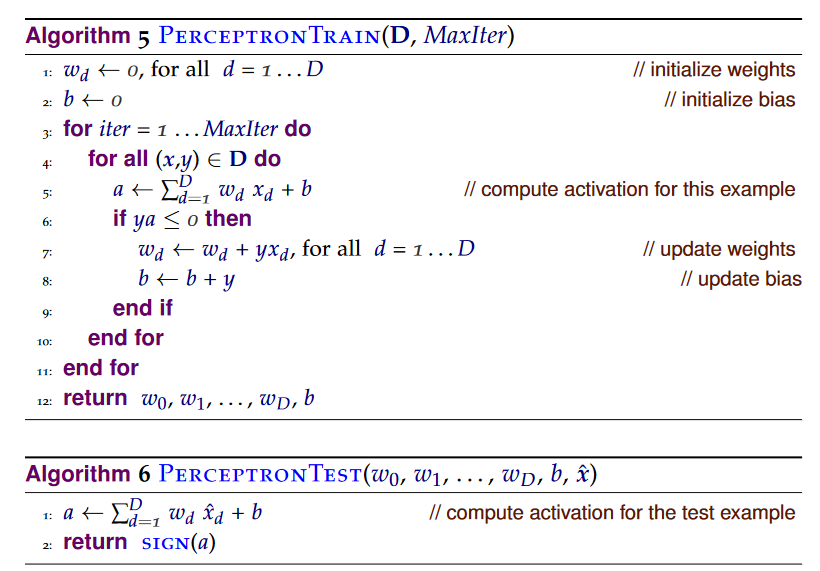
Image source: Hal Daume

In [171]:
class MLP:
    def __init__(self,epoch=100,learning_rate=.01):
        self.epoch = epoch
        self.learning_rate = learning_rate
        self.error_log ={'missclassify':[],'epoch':[]}
    
    def gradient(self,x,y):
        dw = self.learning_rate*y*x
        db = y
        return dw,db
    
    def fit(self,X,y):
        self.m = X.shape[0]
        self.n = X.shape[1]
        self.w = np.zeros(self.n)
        self.b = 0.0
        
        for i in range(1,self.epoch+1):
            errors =0
            for x_sample,y_sample in zip(X,y):
                y_predict = np.dot(x_sample.T,self.w)+self.b
                if np.sign(y_predict*y_sample)<=0:
                    dw,db = self.gradient(x_sample,y_sample)
                    self.w = self.w + dw
                    self.b = self.b + db
                    errors = errors+1
            self.error_log['missclassify'].append(errors)
            self.error_log['epoch'].append(i)
        
        return self.w,self.b
    
    def predict(self,X):
        a = np.dot(X,self.w) + self.b
        y_predict = np.sign(a)
        return y_predict

In [172]:
random_seed = 21
X, y = make_blobs(n_samples=1000, centers=2,random_state=random_seed)
y[y==0]=-1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_seed)

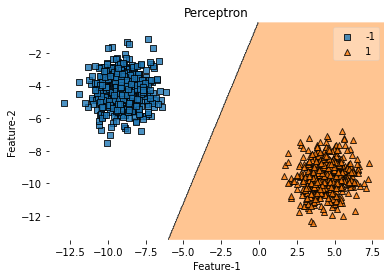

In [177]:
plot_decision_regions(X, y, clf=mlp)
plt.title('Perceptron')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.show()

In [173]:
mlp = MLP(epoch=100)
w,b = mlp.fit(X_train,y_train)

In [174]:
y_pred = mlp.predict(X_test)
print("Accuracy: ", np.mean(y_test==y_pred))

Accuracy:  1.0
